<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла.<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_wine['quality_cat'] = np.where(df_wine.quality > 5, 1, 0)
df_wine = df_wine.drop('quality', axis=1)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
from sklearn.model_selection import ShuffleSplit, train_test_split

X = df_wine.drop('quality_cat', axis=1)
y = df_wine.quality_cat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print 'train data: data {}, target {}'.format(X_train.shape, y_train.shape)

print 'test data: data {}, target {}'.format(X_test.shape, y_test.shape)

train data: data (1279, 11), target (1279,)
test data: data (320, 11), target (320,)


#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [4]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

In [5]:
rs = ShuffleSplit(test_size=0.2, random_state=np.random.randint(np.iinfo(np.int32).max))
rs.get_n_splits()

10

d = 6


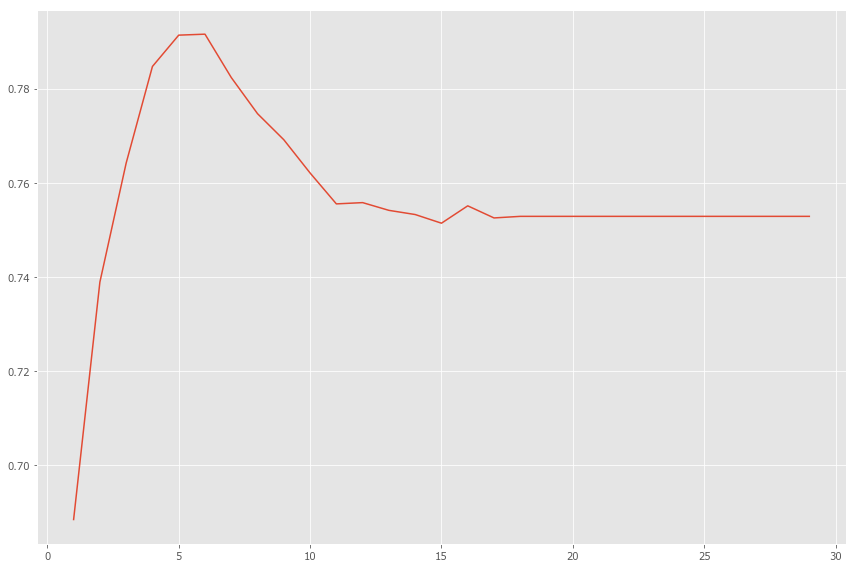

In [6]:
max_depth_range = xrange(1, 30)
score_means = [np.mean(cross_val_score(DecisionTreeClassifier(max_depth=d, random_state=rs.random_state), X, y, scoring='roc_auc', cv=rs)) for d in max_depth_range]
best_max_depth = max_depth_range[np.argmax(score_means)]

print 'd = {}'.format(best_max_depth)

plt.plot(max_depth_range, score_means)
plt.tight_layout()

d = 6


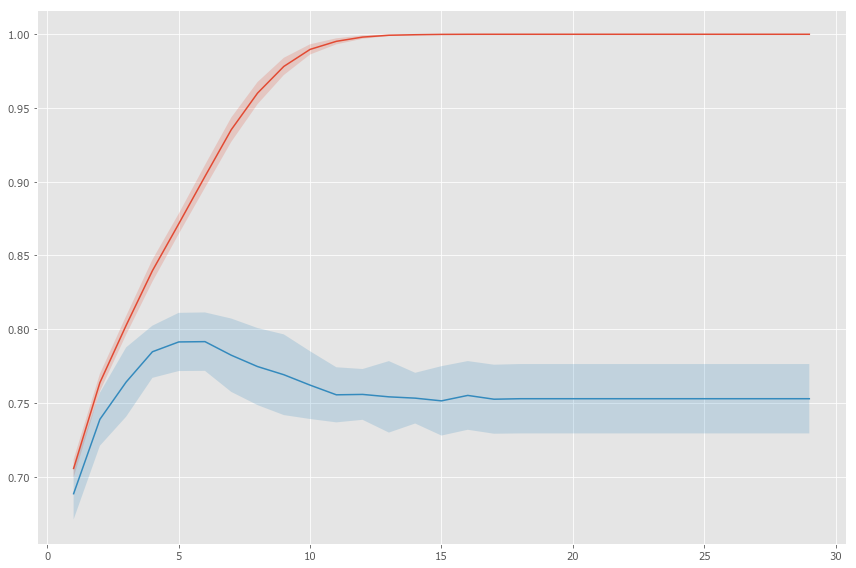

In [7]:
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=rs.random_state), X, y, 'max_depth', max_depth_range, cv=rs, scoring='roc_auc')
train_score_means = train_scores.mean(axis=1)
train_score_stds = train_scores.std(axis=1)
test_score_means = test_scores.mean(axis=1)
test_score_stds = test_scores.std(axis=1)
best_max_depth = max_depth_range[np.argmax(test_score_means)]

print 'd = {}'.format(best_max_depth)

plt.fill_between(max_depth_range, train_score_means - train_score_stds, train_score_means + train_score_stds, alpha=0.2)
plt.plot(max_depth_range, train_score_means)
plt.fill_between(max_depth_range, test_score_means - test_score_stds, test_score_means + test_score_stds, alpha=0.2)
plt.plot(max_depth_range, test_score_means)
plt.tight_layout()

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

,alcohol,total sulfur dioxide,sulphates,volatile acidity,chlorides,pH,density,free sulfur dioxide,citric acid,residual sugar,fixed acidity
0,9.4,34.0,0.56,0.70,0.076,3.51,0.9978,11.0,0.00,1.9,7.4
1,9.8,67.0,0.68,0.88,0.098,3.20,0.9968,25.0,0.00,2.6,7.8
2,9.8,54.0,0.65,0.76,0.092,3.26,0.9970,15.0,0.04,2.3,7.8
3,9.8,60.0,0.58,0.28,0.075,3.16,0.9980,17.0,0.56,1.9,11.2
4,9.4,34.0,0.56,0.70,0.076,3.51,0.9978,11.0,0.00,1.9,7.4


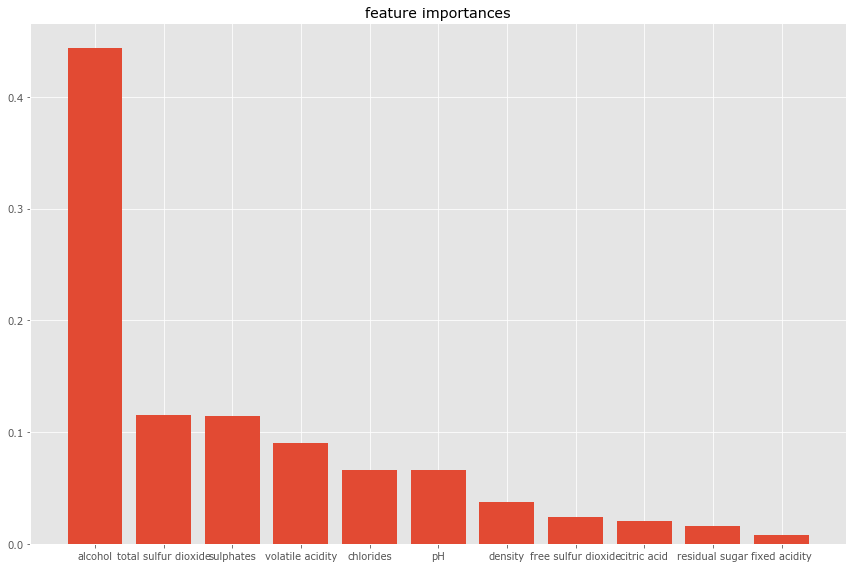

In [8]:
tree = DecisionTreeClassifier(max_depth=best_max_depth, random_state=rs.random_state)
tree.fit(X_train, y_train)
order = np.argsort(tree.feature_importances_)[::-1]

plt.bar(xrange(X.shape[1]), tree.feature_importances_[order])
plt.title('feature importances')
plt.xticks(xrange(X.shape[1]), X.columns[order])
plt.tight_layout()

X[X.columns[order]].head()

#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

In [9]:
y_pred = tree.predict(X_test)
X_test.assign(quality_cat=y_pred).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
565,12.7,0.60,0.49,2.80,0.075,5.0,19.0,0.9994,3.14,0.57,11.4,0
560,12.7,0.60,0.49,2.80,0.075,5.0,19.0,0.9994,3.14,0.57,11.4,0
94,5.0,1.02,0.04,1.40,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,1
428,9.1,0.52,0.33,1.30,0.070,9.0,30.0,0.9978,3.24,0.60,9.3,1
502,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.9990,3.17,0.85,12.0,1


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve

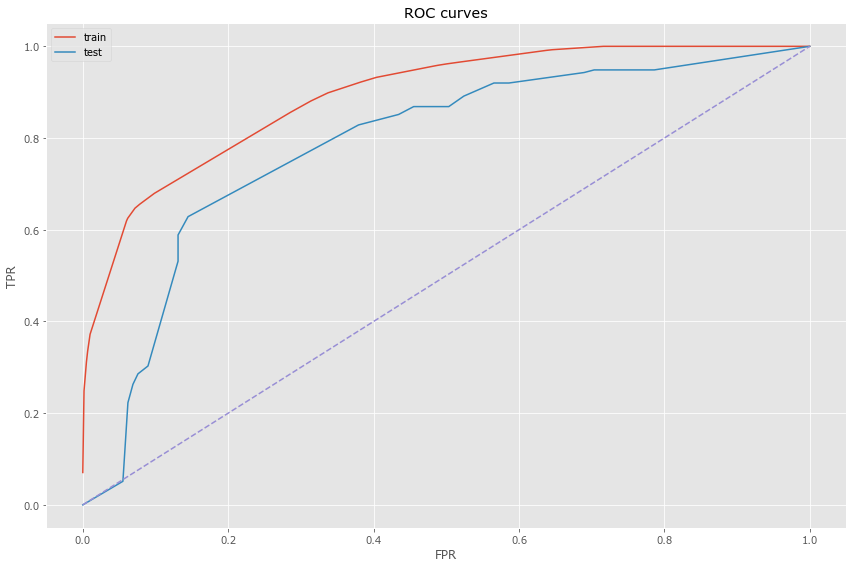

In [11]:
y_proba = tree.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_proba[:, 1])
plt.plot(fpr, tpr)
y_proba = tree.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(['train', 'test'])
plt.title('ROC curves')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.tight_layout()

In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
idx = np.max(np.argwhere(thresholds > 0.5))

print 'accuracy = {}'.format(accuracy)

print 'precision = {}'.format(precision)

print 'recall = {}'.format(recall)

print 'TPR = {}'.format(tpr[idx])

print 'FPR = {}'.format(fpr[idx])

accuracy = 0.734375
precision = 0.725
recall = 0.828571428571
TPR = 0.828571428571
FPR = 0.379310344828


#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [13]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

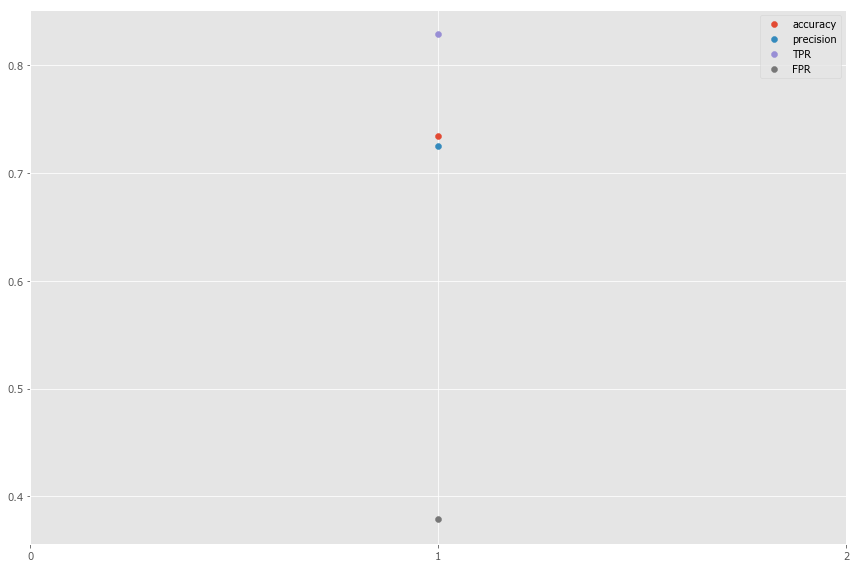

In [14]:
plt.scatter(1, accuracy)
plt.scatter(1, precision)
plt.scatter(1, recall)
plt.scatter(1, fpr[idx])
plt.legend(['accuracy', 'precision', 'TPR', 'FPR'])
plt.xticks(xrange(3))
plt.tight_layout()

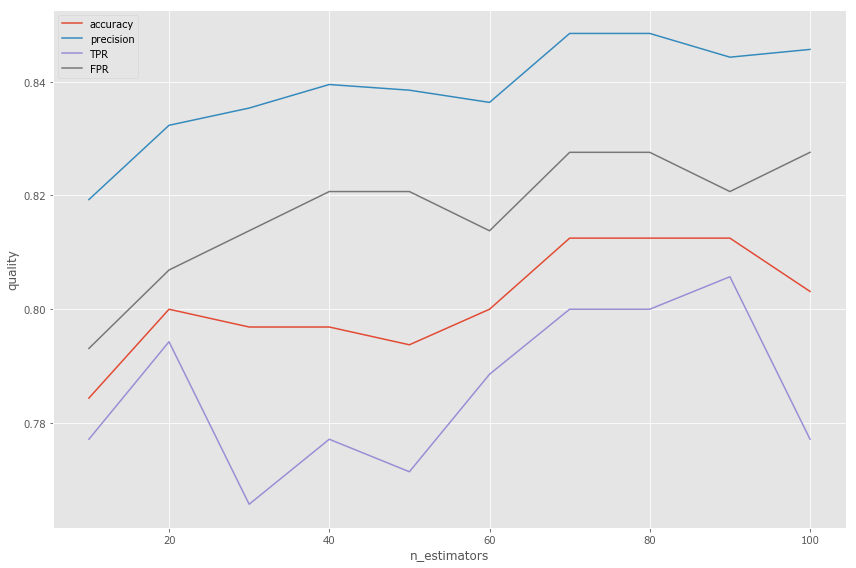

In [15]:
accuracies = []
precisions = []
fprs, tprs = [], []
n_estimators_range = xrange(10, 101, 10)

for n_estimators in n_estimators_range:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=best_max_depth), n_estimators=n_estimators, random_state=rs.random_state)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, np.diag(y_score.T[y_test]))
    idx = np.max(np.argwhere(thresholds > 0.5))
    accuracies.append(accuracy)
    precisions.append(precision)
    tprs.append(tpr[idx])
    fprs.append(fpr[idx])

plt.plot(n_estimators_range, accuracies)
plt.plot(n_estimators_range, precisions)
plt.plot(n_estimators_range, tprs)
plt.plot(n_estimators_range, fprs)
plt.legend(['accuracy', 'precision', 'TPR', 'FPR'])
plt.xlabel('n_estimators')
plt.ylabel('quality')
plt.tight_layout()

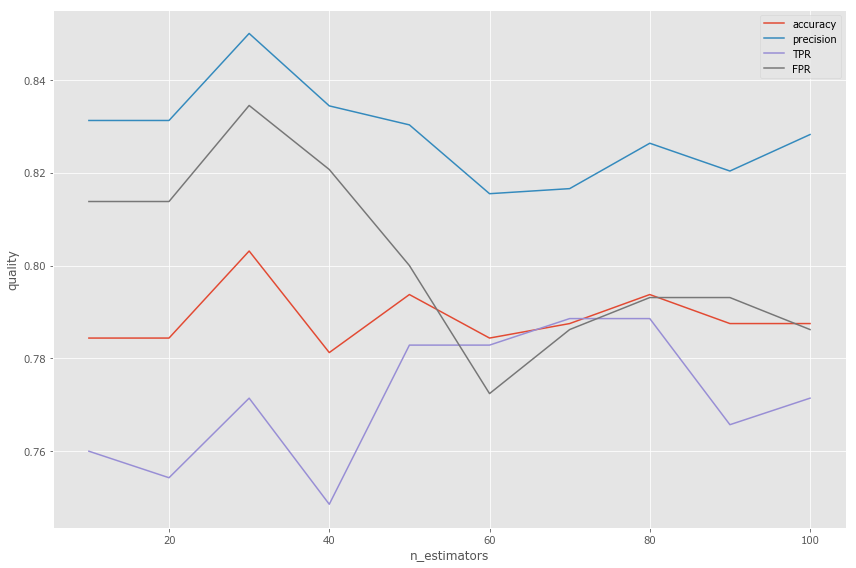

In [16]:
accuracies = []
precisions = []
fprs, tprs = [], []
n_estimators_range = xrange(10, 101, 10)

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_max_depth, random_state=rs.random_state)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_score = rf.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, np.diag(y_score.T[y_test]))
    idx = np.max(np.argwhere(thresholds > 0.5))
    accuracies.append(accuracy)
    precisions.append(precision)
    tprs.append(tpr[idx])
    fprs.append(fpr[idx])

plt.plot(n_estimators_range, accuracies)
plt.plot(n_estimators_range, precisions)
plt.plot(n_estimators_range, tprs)
plt.plot(n_estimators_range, fprs)
plt.legend(['accuracy', 'precision', 'TPR', 'FPR'])
plt.xlabel('n_estimators')
plt.ylabel('quality')
plt.tight_layout()

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomizedSearchCV` подберите наиболее оптимальные параметры для случайного леса
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

clf = GridSearchCV(RandomForestClassifier(random_state=rs.random_state), param_grid={'max_depth': max_depth_range, 'n_estimators': n_estimators_range})
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False,
            random_state=555818082, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': xrange(10, 110, 10), 'max_depth': xrange(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [18]:
clf.best_params_

{'max_depth': 19, 'n_estimators': 100}

In [19]:
rf = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth'], random_state=rs.random_state)
auc = np.mean(cross_val_score(rf, X, y, scoring='roc_auc', cv=rs))
print 'AUC = {}'.format(auc)

AUC = 0.891003767189


In [20]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, np.diag(y_score.T[y_test]))
idx = np.max(np.argwhere(thresholds > 0.5))

print 'accuracy = {}'.format(accuracy)

print 'precision = {}'.format(precision)

print 'TPR = {}'.format(tpr[idx])

print 'FPR = {}'.format(fpr[idx])

accuracy = 0.83125
precision = 0.871165644172
TPR = 0.811428571429
FPR = 0.848275862069


In [21]:
clf = RandomizedSearchCV(RandomForestClassifier(random_state=rs.random_state), param_distributions={'max_depth': max_depth_range, 'n_estimators': n_estimators_range})
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False,
            random_state=555818082, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': xrange(10, 110, 10), 'max_depth': xrange(1, 30)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [22]:
clf.best_params_

{'max_depth': 20, 'n_estimators': 90}

In [23]:
rf = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth'], random_state=rs.random_state)
auc = np.mean(cross_val_score(rf, X, y, scoring='roc_auc', cv=rs))
print 'AUC = {}'.format(auc)

AUC = 0.891075548127


In [24]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, np.diag(y_score.T[y_test]))
idx = np.max(np.argwhere(thresholds > 0.5))

print 'accuracy = {}'.format(accuracy)

print 'precision = {}'.format(precision)

print 'TPR = {}'.format(tpr[idx])

print 'FPR = {}'.format(fpr[idx])

accuracy = 0.85
precision = 0.87573964497
TPR = 0.845714285714
FPR = 0.841379310345
